## Data Analysis for the States of CA, TX, IL


### Step 1. Import libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import  date
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Step 2. Configs
   

In [0]:
state_list=['CA', 'TX', 'IL']
state_list_names=['California', 'Texas', 'Illinois']

severity_lst=[1,2,3,4]

# Plot configs
#color_lst=['r','b','k','g']
#marker_lst=['D','o','*']
#linestyle_lst=['dashed','dashdot','solid']

month_lst = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
weekday_lst = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_lst_full = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_lst= np.arange(24)
td='Time_Duration(min)'

### Step 3. Import dataset

In [0]:
# Import the data and filter out states we need 
df = pd.read_csv('/content/drive/My Drive/ds/US_Accidents_Dec19.csv')
df = df[df.State.isin(state_list)]
df.shape

(1047656, 49)

### Step 4. Data manipulation: extract year, month, day, hour, weekday, and total time of accidents

In [0]:
# Extract year, month, day, hour, & weekday information

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour, weekday and time_duration information
df['Start_Year']=df['Start_Time'].dt.year
df['Start_Month']=df['Start_Time'].dt.strftime('%b')
df['Start_Day']=df['Start_Time'].dt.day
df['Start_Hour']=df['Start_Time'].dt.hour
df['Start_Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

# Check the dataframe
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Month,Start_Day,Start_Hour,Start_Weekday,Time_Duration(min)
728,A-729,MapQuest,201.0,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,NaN,NaN,0.0,Right hand shoulder blocked due to accident on...,NaN,Magazine St,R,Vallejo,Solano,CA,94591,US,US/Pacific,KAPC,2016-06-21 10:54:00,75.0,NaN,48.0,30.00,10.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Jun,21,10,Tue,30.0
729,A-730,MapQuest,201.0,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,NaN,NaN,0.0,Accident on I-880 Northbound at Exit 26 Tennys...,NaN,I-880 N,R,Hayward,Alameda,CA,94544,US,US/Pacific,KHWD,2016-06-21 10:54:00,75.0,NaN,48.0,30.06,10.0,WSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Jun,21,10,Tue,46.0
730,A-731,MapQuest,201.0,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,NaN,NaN,0.0,Right lane blocked due to accident on CA-24 We...,NaN,I-680 N,R,Walnut Creek,Contra Costa,CA,94595,US,US/Pacific,KCCR,2016-06-21 10:53:00,82.9,NaN,31.0,29.97,10.0,NNW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Jun,21,10,Tue,30.0
731,A-732,MapQuest,201.0,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,NaN,NaN,0.0,#4 &amp; HOV lane blocked due to accident on I...,NaN,N De Anza Blvd,R,Cupertino,Santa Clara,CA,95014,US,US/Pacific,KNUQ,2016-06-21 10:56:00,75.9,NaN,48.0,30.04,10.0,NNE,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Jun,21,10,Tue,30.0
732,A-733,MapQuest,201.0,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,NaN,NaN,0.0,Right hand shoulder blocked due to accident on...,NaN,Norman Y Mineta Hwy,R,San Jose,Santa Clara,CA,95118,US,US/Pacific,KRHV,2016-06-21 09:50:00,75.2,NaN,41.0,30.06,10.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Jun,21,10,Tue,48.0


### Step 5. Data Analysis


#### A: Accident Map

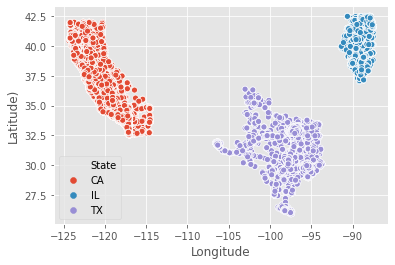

In [0]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='State')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

#### B: Time series analysis by month

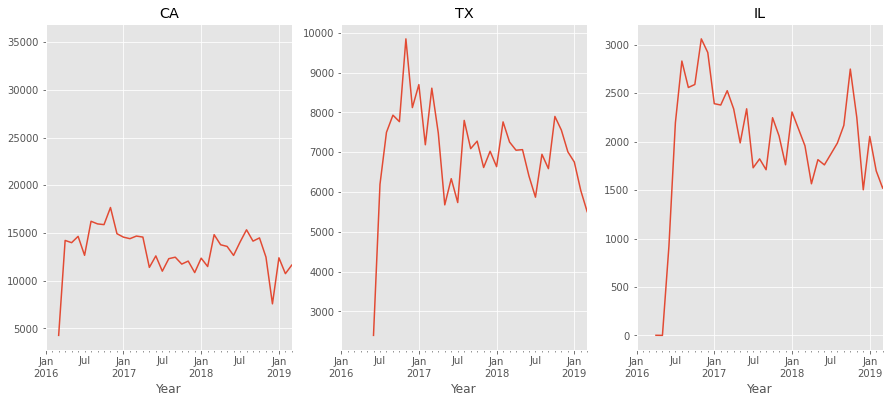

In [0]:
df.set_index('Start_Time',drop=True,inplace=True)

fig= plt.figure(figsize=(15,6))

for i,state in enumerate(state_list):
    
    plt.subplot(1, 3, 1+i)
    df[df['State']==state].resample('M').count()['ID'].plot()
    
    plt.xlim('2016-Jan','2019-Mar')
    plt.xlabel('Year')
    plt.title('{}'.format(state))

plt.show()

# Reset the index
df.reset_index(inplace=True)

#### C: Severity Distribution

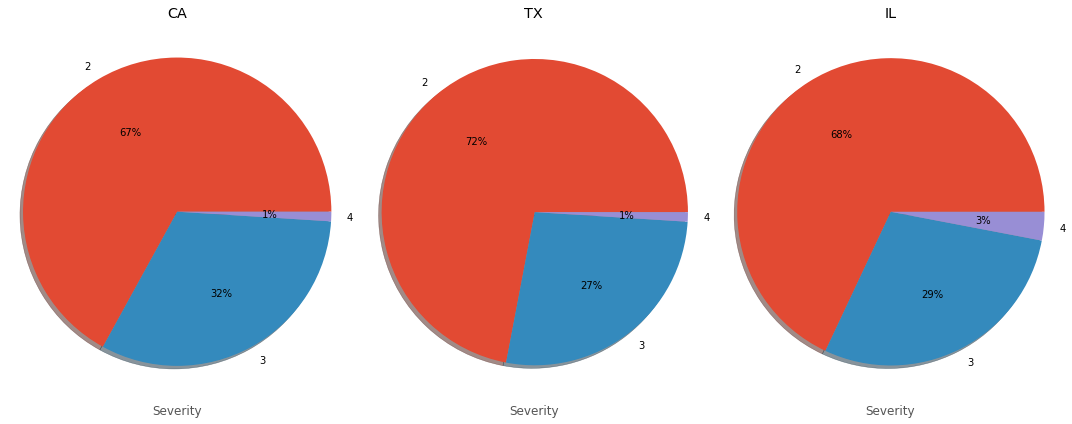

In [0]:
# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=0

# Define autopct: only display values > cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_list):
    
    plt.subplot(1, 3, 1+i)
    
    #filter dataset for plotting
    df_temp=df[df['State']==state]['Severity'].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel('Severity')
    plt.title(state)

plt.tight_layout()
plt.show()

### Step 6. Data Analysis - When do most accidents happen?


#### A: Day vs Night
      

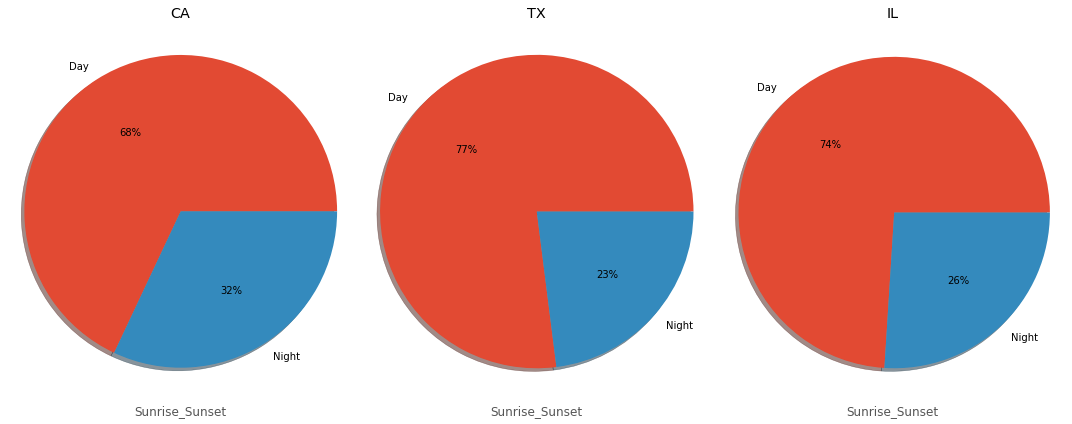

In [0]:
fig= plt.figure(figsize=(15,6))

for i,state in enumerate(state_list):
    
    plt.subplot(1, 3, 1+i)
    df_temp=df[df['State']==state]['Sunrise_Sunset'].value_counts(normalize=True).round(2)

    labels = [n for n, v in zip(df_temp.index, df_temp)] 
    
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel('Sunrise_Sunset')
    plt.title(state)
    
plt.tight_layout()
plt.show()

#### B. Day of the week

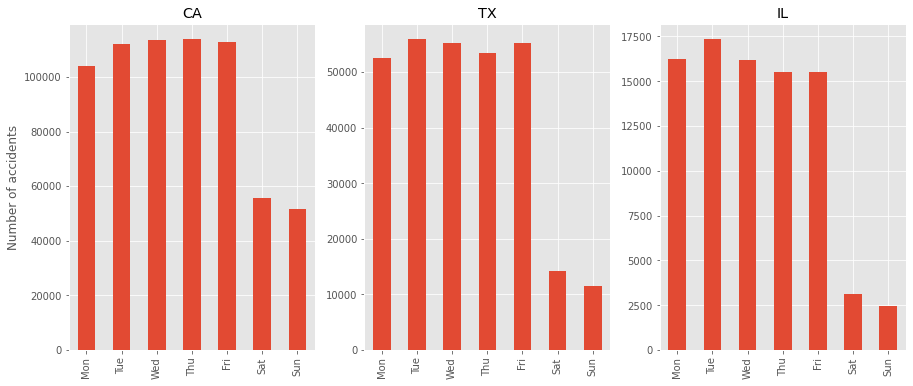

In [0]:
fig= plt.figure(figsize=(15,6))

for i,state in enumerate(state_list):
    plt.subplot(1, 3, 1+i)
    df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst).plot(kind='bar').set_title(state)
    plt.xlabel('')
    if i == 0:
      plt.ylabel('Number of accidents')

##### C. Hour of the day

([<matplotlib.axis.XTick at 0x7f6c27348e80>,
 <a list of 24 Text major ticklabel objects>)

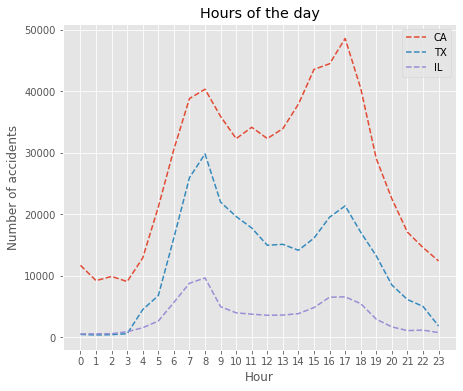

In [0]:
fig= plt.figure(figsize=(24,6))

plt.subplot(1, 3, 1)
for i,state in enumerate(state_list):
   df[df['State']==state].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed')

plt.ylabel('Number of accidents')
plt.xlabel('Hour')
plt.legend(state_list)
plt.title('Hours of the day')
plt.xticks(np.arange(0, 24, step=1))

### Step 7. Data Analysis - Where do most accidents happen?

#### A. County

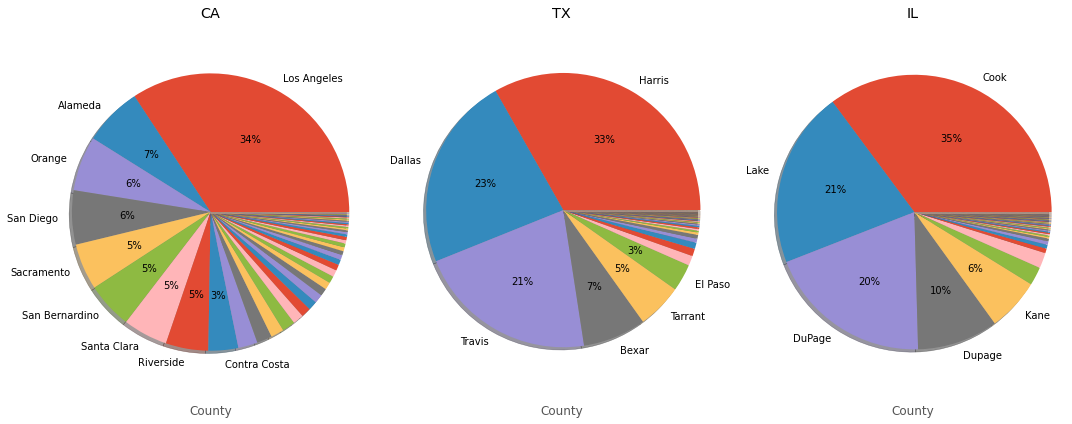

In [0]:
fig= plt.figure(figsize=(15,6))

pct_cutoff=2.5

for i,state in enumerate(state_list):
    
    plt.subplot(1, 3, 1+i)
    df_temp=df[df['State']==state]['County'].value_counts(normalize=True).round(8)

    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    plt.axis('equal')
    plt.xlabel('County')
    plt.title(state)

plt.tight_layout()
plt.show()

#### C. Location

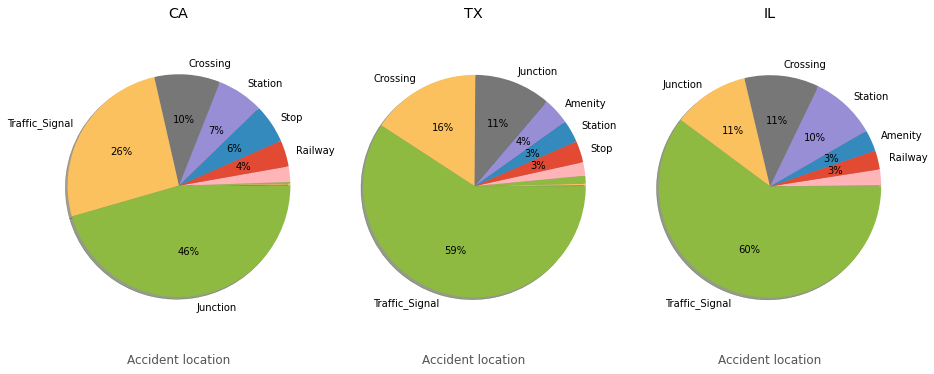

In [0]:
df.set_index('State',drop=True,inplace=True)
df_bool=df.select_dtypes(include=['bool'])
df.reset_index(inplace=True)

fig= plt.figure(figsize=(15,6))
pct_cutoff=2.5

for i,state in enumerate(state_list):
    
    plt.subplot(1, 3, 1+i)
    df_temp=df_bool[df_bool.index==state]
    df_temp=(df_temp.sum(axis=0)/df_temp.sum(axis=0).sum()).sort_values()

    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    plt.axis('equal')
    plt.xlabel('Accident location')
    plt.title(state)
plt.show()

### Step 8. Data Analysis -- With what weather condition do most accidents happen? 

#### A. Top weather conditions with accidents

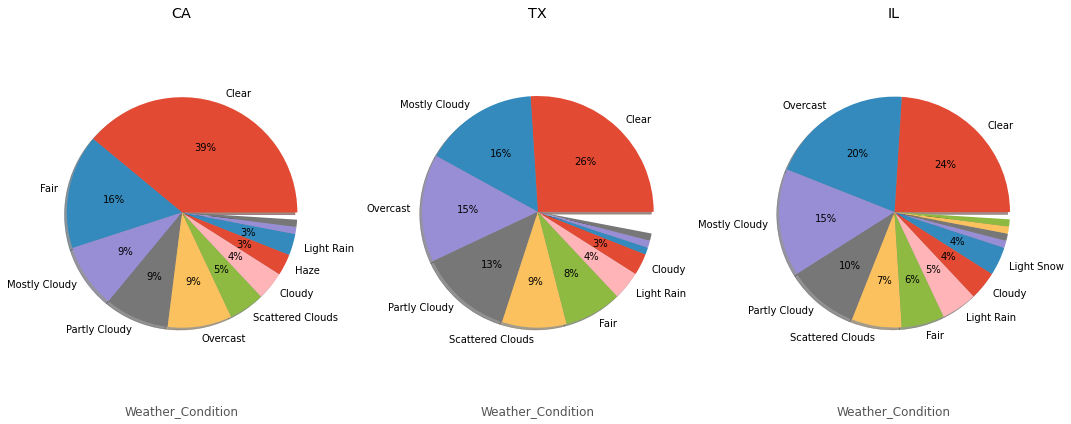

In [0]:
fig= plt.figure(figsize=(15,6))
pct_cutoff=2

for i,state in enumerate(state_list):
    plt.subplot(1, 3, 1+i)
    df_temp=df[df['State']==state]['Weather_Condition'].value_counts(normalize=True).round(2)
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    plt.axis('equal')
    plt.xlabel('Weather_Condition')
    plt.title(state)
plt.tight_layout()
plt.show()

#### B. Weather conditions for each accident severity = 4

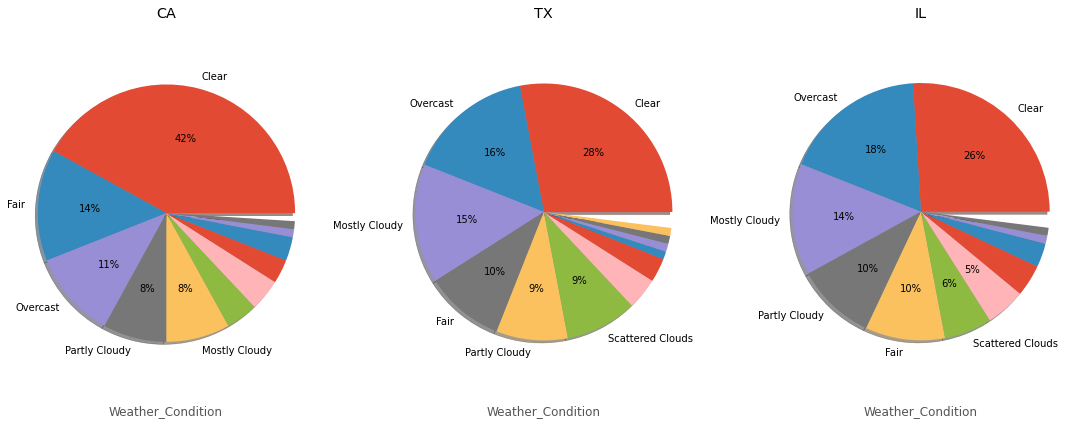

In [0]:
fig= plt.figure(figsize=(15,6))

pct_cutoff=5

for j,state in enumerate(state_list):
    plt.subplot(1, 3, j+1)
    df_temp=df[(df['State']==state) & (df['Severity']==4)]['Weather_Condition'].value_counts(normalize=True).round(2)

    labels = [n if v > pct_cutoff/100 else ''
          for n, v in zip(df_temp.index, df_temp)] 

    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    plt.axis('equal')
    plt.xlabel('Weather_Condition')
    plt.title(state)

plt.tight_layout()
plt.show()